# Problem Statement

Goal: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

1. IDEAL
The ideal scenario is that the regression model I produce will be able to accurately predict the house price of previously unseen houses.

2. REALITY
I have the Ames housing data which has to be cleaned, organised and improved to enable me to tune my model. The data in its current state will not provide a very useful model. I will also have to choose my variables carefully and possibly transform them into more useful metrics.

3. CONSEQUENCES
Without cleaning the data and tuning the model I wont be able to predict the house prices very accurately and score well on Kaggle.

4. PROPOSAL
My proposal is to start by cleaning the data and using brute force and use as many features as I can and let elastic-net determine the useful ones. After this I will create a new model refining features I find interesting through my EDA and my external research to try and improve it.

# Executive Summary



### Contents:
- [Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Data Import and Cleaning

In [2]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from ast import literal_eval

%matplotlib inline

#### Get Data

# Exploratory Data Analysis

I will start by removing those columns and visualising the data

In [3]:
eda_df = pd.read_csv('./datasets/outputs/data_cleaning_1.0.csv')

In [4]:
# Drop columns for EDA and visualistaion 
eda_df.drop(columns=['pool_qc','fence','fireplace_qu','Unnamed: 0'],inplace=True)

In [5]:
eda_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517.0,13517,Pave,None,IR1,Lvl,...,0,0,0,0,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,0,0,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,0,0,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,0,0,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,0,0,None,0,3,2010,WD,138500


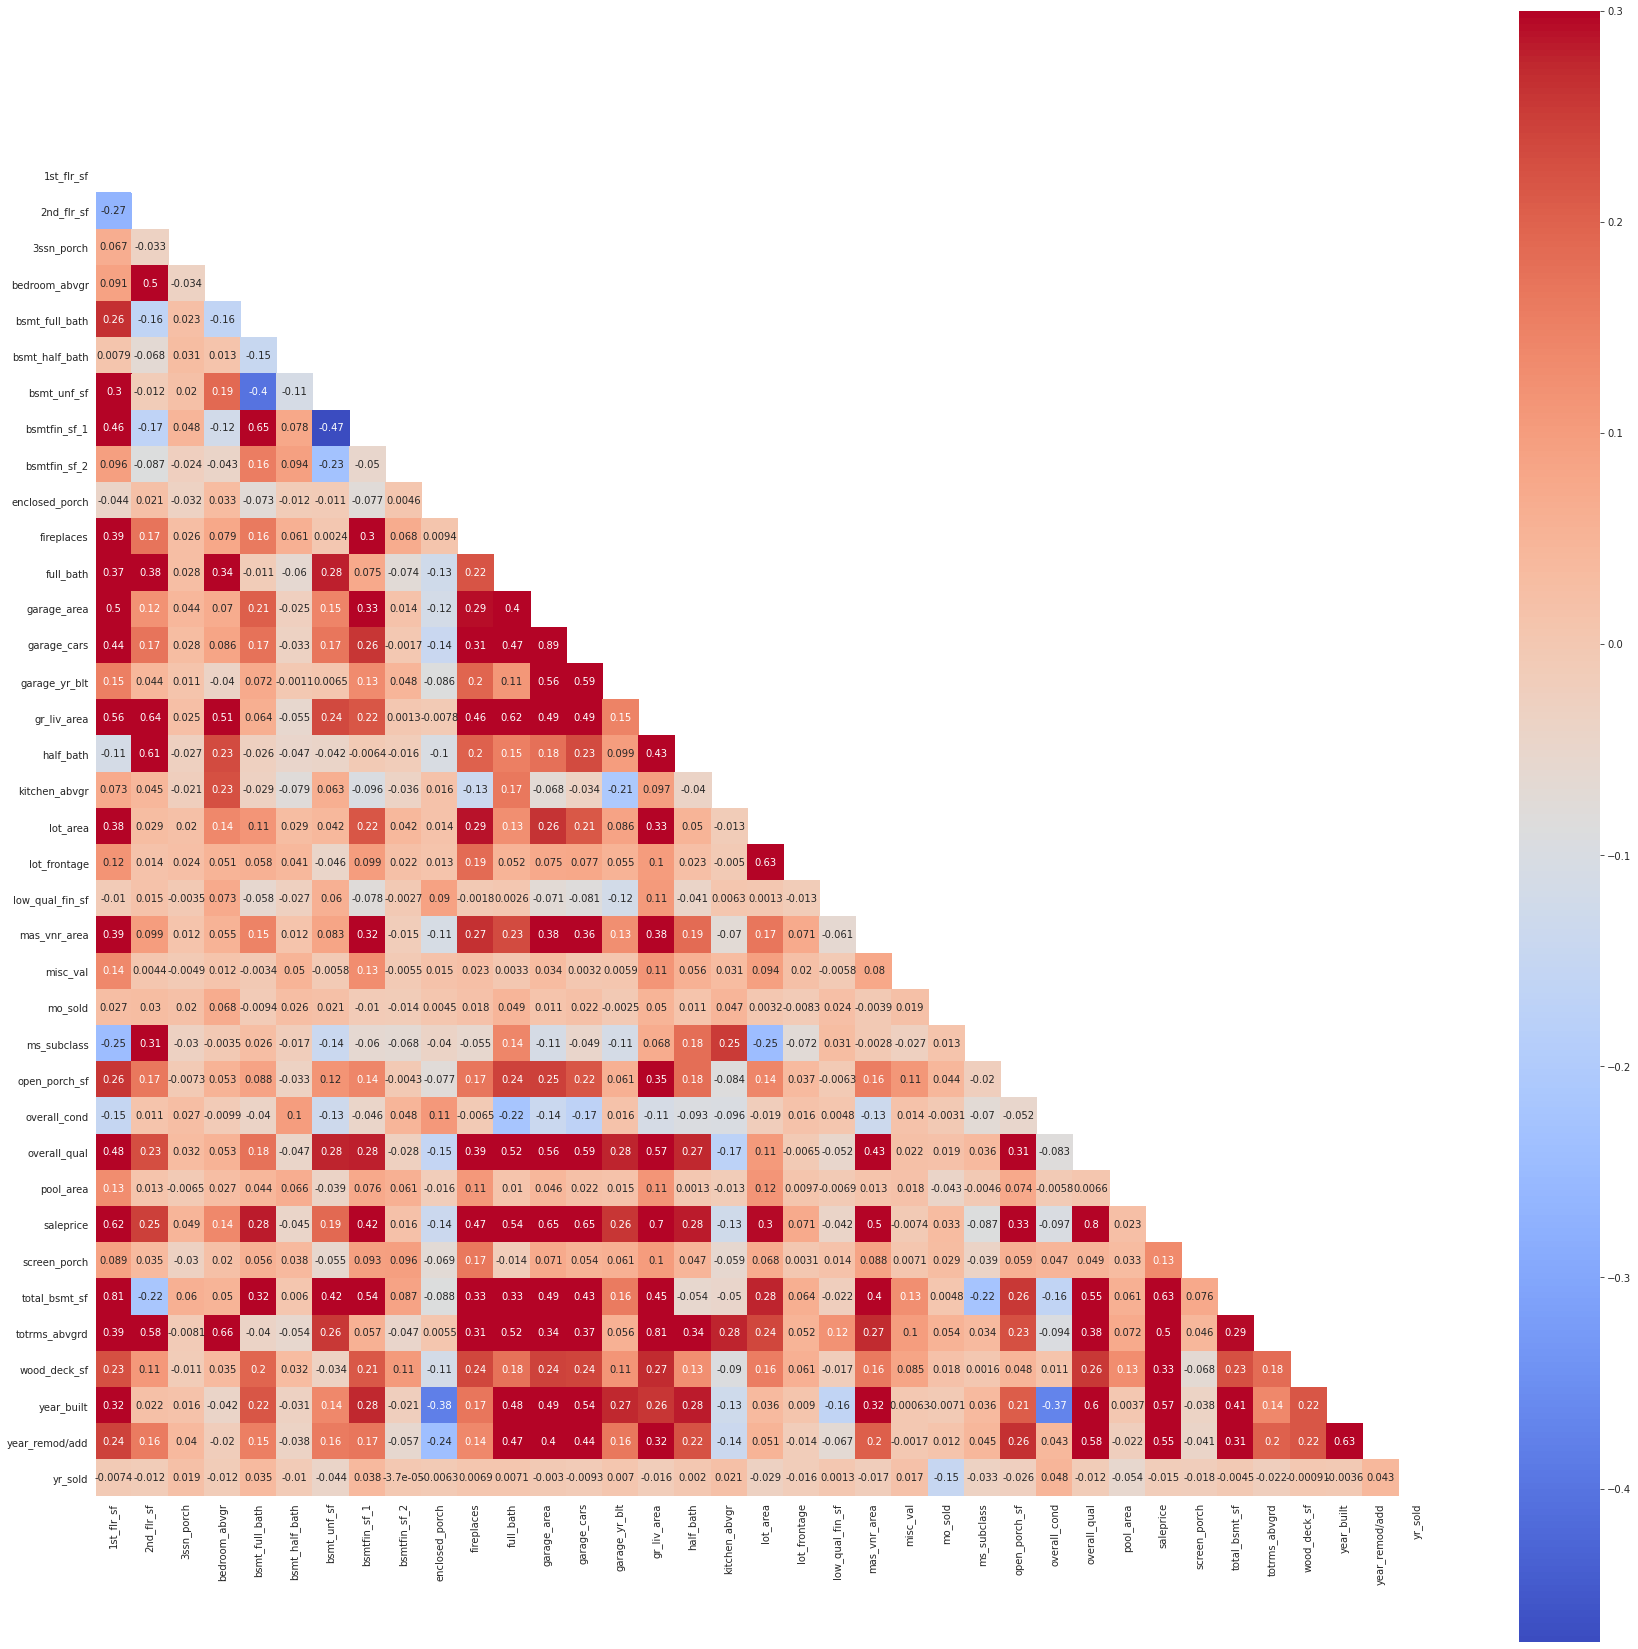

In [6]:
# plot correlations
plt.figure(figsize=(30,30))

#corr = eda_df.corr()
corr = eda_df[eda_df.columns.difference(['id', 'pid'])].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap="coolwarm")

Despite being large with many features the heatmap still highlights the correlated columns well. Some of the features also appear correlated. Therefore may be giving extra weight. However for this first model I will leave all numeric features in and then try and improve it with further iterations. 

Before that I will create a baseline using averages.

##### Baseline



##### Test a model

In [7]:
X_related_feats = ['1st_flr_sf','bsmtfin_sf_1','fireplaces','full_bath','garage_area','gr_liv_area','overall_qual']
X = eda_df[X_related_feats]
y = eda_df['saleprice']

In [8]:
# split the test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [10]:
# instantiate the models
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1,10,100))
enet = ElasticNetCV(l1_ratio=np.linspace(0.0001,1,100), n_alphas=100)


#### cross validation

In [11]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.7358226275303935

In [12]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.7353991397613382

In [13]:
ridge_scores = cross_val_score(ridge, X_train,y_train, cv=5)
ridge_scores.mean()

0.736099228546405

In [14]:
enet_scores = cross_val_score(enet, X_train, y_train, cv=5)
enet_scores.mean()

0.7354683816935023

In [15]:
ridge_scores.mean() > lr_scores.mean() > enet_scores.mean()> lasso_scores.mean() 

True